In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.descriptivestats import sign_test
from clint.textui import progress

In [3]:
# dataset = pd.read_csv('data_v1-01.csv')
# X_base = dataset.iloc[:, 0:1].values
# y_base = dataset.iloc[:, 1].values
data = np.genfromtxt('data_v1-04.csv', delimiter=',', skip_header=True)
X_base = data[:, 0]
y_base = data[:, 1]
N = 50

In [6]:

f = plt.figure()
plt.scatter(X_base, y_base, color='red') 
plt.title('Исходные данные')
plt.ylabel('y')
plt.xlabel('X')
plt.savefig(f'base_data.png',dpi=300)
plt.close(f)

In [15]:
class RegressionModel:
    def __init__(self, model, test_size=0.3, m=4):
        self.model = model
        X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=test_size, random_state=42)
        scaler = StandardScaler()
        scaler.fit(X_train.reshape(-1, 1))
        self.X_train = scaler.transform(X_train.reshape(-1, 1))
        self.X_test = scaler.transform(X_test.reshape(-1, 1))
        target_scaler = StandardScaler()
        target_scaler.fit(y_train.reshape(-1, 1))
        self.y_train = target_scaler.transform(y_train.reshape(-1, 1))
        self.y_test = target_scaler.transform(y_test.reshape(-1, 1))
        self.test_size = test_size
        self.min = np.min(X_train, axis=0)
        self.max = np.max(X_train, axis=0)
        self.m = m
        self.transformed_X_train = self.transform(self.X_train)
        self.transformed_X_test = self.transform(self.X_test)
        self.fit()
    
    def transform(self, X):
        c = np.linspace(self.min, self.max, self.m)
        transformed = c[0]*(X**0)
        for i in range(1, self.m):
            transformed = np.c_[transformed, c[i]*(X**i)]
        if (self.m == 1):
            return transformed.reshape(-1, 1)
        return transformed
    
    
    def fit(self):
        self.model.fit(self.transformed_X_train, self.y_train)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def predict_train(self):
        return self.model.predict(self.transformed_X_train)
    
    def predict_test(self):
        return self.model.predict(self.transformed_X_test)
    
    def mse_train(self):
        y_pred = self.predict_train()
        return mean_squared_error(self.y_train, y_pred)
    
    def mse_test(self):
        y_pred = self.predict_test()
        return mean_squared_error(self.y_test, y_pred)
    
    def bias_train(self):
        return self.y_train - self.predict_train()
    
    def bias_test(self):
        return self.y_test - self.predict_test()

In [21]:
mse_test_lin = []
mse_train_lin = []
for i in range(1, N+1):
    lin_regr = linear_model.LinearRegression()
    lin_model = RegressionModel(lin_regr, m=i)
    mse_test_lin.append(lin_model.mse_test())
    mse_train_lin.append(lin_model.mse_train())
alpha = 0.0001
mse_test_ridge_0 = []
mse_train_ridge_0 = []
for i in range(1, N+1):
    ridge_regr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridge_model = RegressionModel(ridge_regr, m=i)
    mse_test_ridge_0.append(ridge_model.mse_test())
    mse_train_ridge_0.append(ridge_model.mse_train())
alpha = 1000
mse_test_ridge_1 = []
mse_train_ridge_1 = []
for i in range(1, N+1):
    ridge_regr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridge_model = RegressionModel(ridge_regr, m=i)
    mse_test_ridge_1.append(ridge_model.mse_test())
    mse_train_ridge_1.append(ridge_model.mse_train())
    
f = plt.figure()
plt.plot(mse_train_lin, 'r', label = "linear train") 
plt.plot(mse_train_ridge_0, 'g', label="ridge λ ~ 0 train") 
plt.plot(mse_train_ridge_1, 'b', label="ridge λ >> 0 train")
plt.plot(mse_test_lin, 'y', label = "linear test") 
plt.plot(mse_test_ridge_0, 'brown', label="ridge λ ~ 0 test") 
plt.plot(mse_test_ridge_1, 'black', label="ridge λ >> 0 test")
plt.title('Зависимость MSE регрессионных моделей на обучающей и тестовой выборках от параметра m')
plt.ylabel('MSE')
plt.xlabel('m - число регрессоров')
plt.legend()
plt.savefig(f'MSE_m.png',dpi=300)
plt.close(f)


/home/shurik/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.49914e-17): result may not be accurate.
  overwrite_a=True).T
/home/shurik/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47437e-17): result may not be accurate.
  overwrite_a=True).T
/home/shurik/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.5636e-18): result may not be accurate.
  overwrite_a=True).T
/home/shurik/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.30967e-18): result may not be accurate.
  overwrite_a=True).T
/home/shurik/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.40935e-19): result may not be accurate.
  overwrite_a=True).T
/home/shurik/.local/lib/python3.7/si

In [34]:

lin_regr = linear_model.LinearRegression()
lin_model = RegressionModel(lin_regr)

f = plt.figure()
plt.scatter(X_base, y_base, color='red')
tmp = pd.DataFrame(np.c_[lin_model.X_train, lin_model.predict_train()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='green', label = "linear train") 
tmp = pd.DataFrame(np.c_[lin_model.X_test, lin_model.predict_test()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='blue', label = "linear test") 
plt.title('linear (x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.savefig(f'l_x.png',dpi=300)
plt.close(f)

ridge_regr = linear_model.Ridge(alpha=0.0001, fit_intercept=False)
ridge_model = RegressionModel(ridge_regr)

f = plt.figure()
plt.scatter(X_base, y_base, color='red') 
tmp = pd.DataFrame(np.c_[ridge_model.X_train, ridge_model.predict_train()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='green', label = "ridge λ ~ 0 train") 
tmp = pd.DataFrame(np.c_[ridge_model.X_test, ridge_model.predict_test()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='blue', label = "ridge λ ~ 0 test") 
plt.title('ridge λ ~ 0 (x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.savefig(f'r_0.png',dpi=300)
plt.close(f)

ridge_regr = linear_model.Ridge(alpha=1000, fit_intercept=False)
ridge_model = RegressionModel(ridge_regr)

f = plt.figure()
plt.scatter(X_base, y_base, color='red') 
tmp = pd.DataFrame(np.c_[ridge_model.X_train, ridge_model.predict_train()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='green', label = "ridge λ >> 0  train") 
tmp = pd.DataFrame(np.c_[ridge_model.X_test, ridge_model.predict_test()], columns=['X', 'y']).sort_values(by=['X'])
plt.plot(tmp['X'], tmp['y'], color='blue', label = "ridge λ >> 0  test") 
plt.title('ridge λ >> 0  (x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.savefig(f'r_1.png',dpi=300)
plt.close(f)

    



In [35]:
alphas = [10**(i) for i in range (-4, 4)]
coefs = []
for a in alphas:
    regr = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge = RegressionModel(regr, m=10)
    coefs.append(ridge.model.coef_.reshape(-1))
f = plt.figure()
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('coefs')
ax.invert_xaxis()
plt.legend([f'X{i}' for i in range(len(coefs[0]))])
plt.title('Зависимость значений коэффициентов регрессионной модели от параметра гребневой регрессии')
plt.savefig(f'coef.png',dpi=300)
plt.close(f)

In [37]:
for name, model in [("linear", linear_model.LinearRegression()), ("ridge λ ~ 0", linear_model.Ridge(alpha=0.001, fit_intercept=False)), ("ridge λ >> 0", linear_model.Ridge(alpha=1000, fit_intercept=False))]:
    res_var_test = {}
    res_var_train = {}
    bias_test = {}
    bias_train = {}
    for i in range(100):
        lin_regr = model
        lin_model = RegressionModel(lin_regr, m=10)
        y_pred_test = lin_model.predict_test()
        for x, y in zip(lin_model.X_test, y_pred_test):
            if x[0] in res_var_test:
                res_var_test[x[0]].append(y[0])
            else:
                res_var_test.update({x[0]:[y[0]]})
        y_pred_train = lin_model.predict_train()
        for x, y in zip(lin_model.X_train, y_pred_train):
            if x[0] in res_var_train:
                res_var_train[x[0]].append(y[0])
            else:
                res_var_train.update({x[0]:[y[0]]})

        for x, y in zip(lin_model.X_test, lin_model.bias_test()):
            if x[0] in bias_test:
                bias_test[x[0]].append(y[0])
            else:
                bias_test.update({x[0]:[y[0]]})

        for x, y in zip(lin_model.X_train, lin_model.bias_train()):
            if x[0] in bias_train:
                bias_train[x[0]].append(y[0])
            else:
                bias_train.update({x[0]:[y[0]]})

    tmp_res = [(x, np.var(y)) for x, y in sorted(res_var_test.items())]
    tmp_var_test = pd.DataFrame(tmp_res, columns=['X', 'y']).sort_values(by=['X'])
    tmp_res = [(x, np.var(y)) for x, y in sorted(res_var_train.items())]
    tmp_var_train = pd.DataFrame(tmp_res, columns=['X', 'y']).sort_values(by=['X'])
    tmp_res = [(x, np.average(y)) for x, y in sorted(bias_test.items())]
    tmp_bias_test = pd.DataFrame(tmp_res, columns=['X', 'y']).sort_values(by=['X'])
    tmp_res = [(x, np.average(y)) for x, y in sorted(bias_train.items())]
    tmp_bias_train = pd.DataFrame(tmp_res, columns=['X', 'y']).sort_values(by=['X'])

    f = plt.figure()
    plt.plot(tmp_var_test['X'], tmp_var_test['y'], label='var_test', color='blue')
    plt.plot(tmp_var_train['X'], tmp_var_train['y'], label='var_train', color='green')
    plt.yscale('log')
    #plt.plot(range(2, 9), mse[2], label='mse')
    plt.title(f'Variance (x) {name}')
    plt.xlabel('x')
    plt.ylabel('Variance log')
    plt.legend()
    plt.savefig(f'var_{name}.png',dpi=300)
    plt.close(f)


    f = plt.figure()
    plt.plot(tmp_bias_test['X'], tmp_bias_test['y'], label='bias_test', color='blue')
    plt.plot(tmp_bias_train['X'], tmp_bias_train['y'], label='bias_train', color='green')
    #plt.plot(range(2, 9), mse[2], label='mse')
    plt.title(f'Bias (x) {name}')
    plt.xlabel('x')
    plt.ylabel('Bias')
    plt.legend()
    plt.savefig(f'bias_{name}.png',dpi=300)
    plt.close(f)


    f = plt.figure()
    plt.hist(tmp_var_test['y'], 10,density=True, facecolor='blue')
    plt.title(f'Variance test {name}')
    plt.savefig(f'Bar_var_test_{name}.png')
    plt.close(f)

    f = plt.figure()
    plt.hist(tmp_var_train['y'], 10,density=True, facecolor='blue')
    plt.title(f'Variance train {name}')
    plt.savefig(f'Bar_var_train_{name}.png')
    plt.close(f)


    f = plt.figure()
    plt.hist(tmp_bias_test['y'], 10,density=True, facecolor='blue')
    plt.title(f'Bias test {name}')
    plt.savefig(f'Bar_bias_test_{name}.png')
    plt.close(f)

    f = plt.figure()
    plt.hist(tmp_bias_train['y'], 10,density=True, facecolor='blue')
    plt.title(f'Bias train {name}')
    plt.savefig(f'Bar_bias_train_{name}.png')
    plt.close(f)

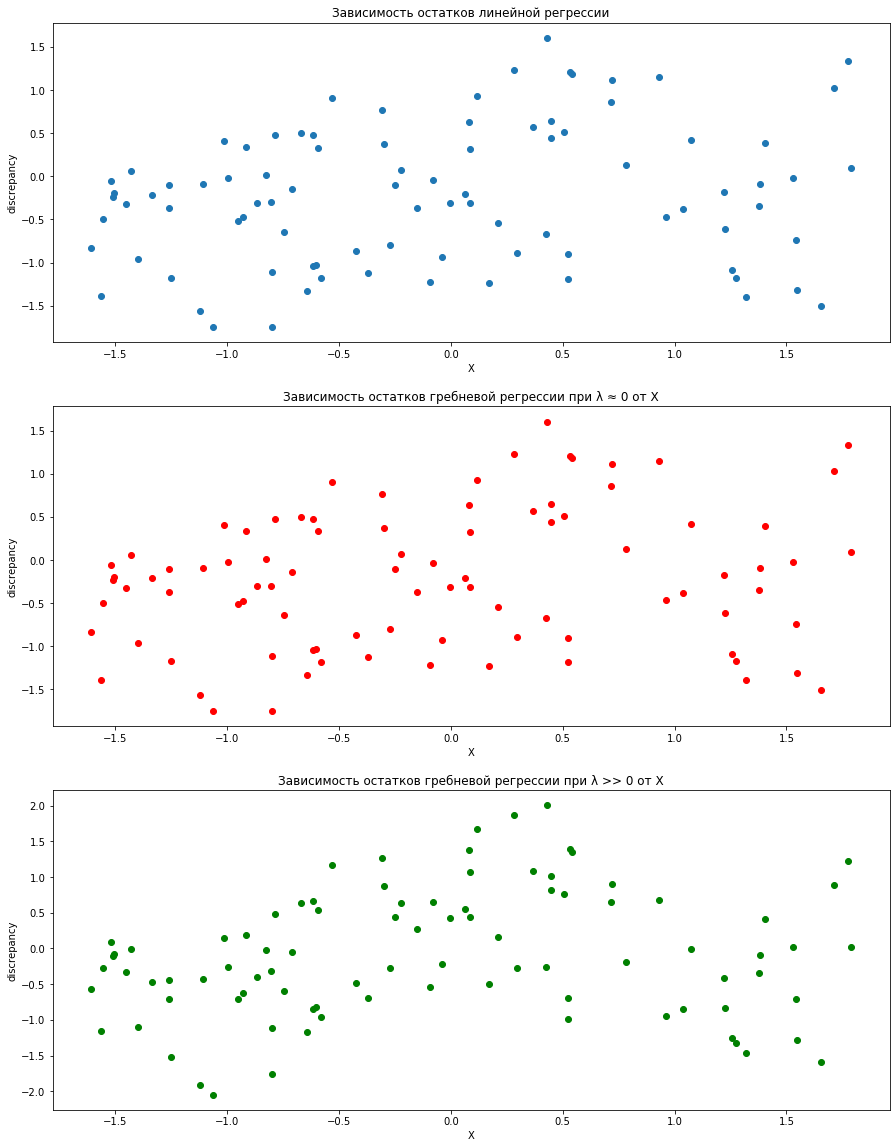

In [41]:
lin_regr = linear_model.LinearRegression()
lin_model = RegressionModel(lin_regr, m=10)
lin_discrepancy = lin_model.bias_test()
alpha = 0.0001
ridge_regr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
ridge_model0 = RegressionModel(ridge_regr, m=10)
ridge0_discrepancy = ridge_model0.bias_test()
alpha = 1000
ridge_regr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
ridge_model1 = RegressionModel(ridge_regr, m=10)
ridge1_discrepancy = ridge_model1.bias_test()

fig, ax = plt.subplots(3,1, figsize=(15,20))
ax[0].scatter(lin_model.X_test, lin_discrepancy)
ax[0].set_title("Зависимость остатков линейной регрессии")
ax[0].set_xlabel('X')
ax[0].set_ylabel('discrepancy')
ax[1].scatter(ridge_model0.X_test, ridge0_discrepancy, color="red") 
ax[1].set_title("Зависимость остатков гребневой регрессии при λ ≈ 0 от X")
ax[1].set_xlabel('X')
ax[1].set_ylabel('discrepancy')
ax[2].scatter(ridge_model1.X_test, ridge1_discrepancy, color="green")
ax[2].set_title("Зависимость остатков гребневой регрессии при λ >> 0 от X")
ax[2].set_xlabel('X')
ax[2].set_ylabel('discrepancy')

plt.savefig('discrepancy.png')

Визуально в случае линейной регрессии и гребневой регресии с параметром λ ≈ 0 не удается обнаружить признаки непостоянства дисперсии, но в случае гребневой регрессии с параметром λ >> 0 визуально заметен тренд

Рассчитаем средние для трех выборок

In [42]:
#Визуально в случае линейной регрессии и гребневой регресии с параметром λ ≈ 0 не удается обнаружить признаки непостоянства дисперсии, но в случае гребневой регрессии с параметром λ >> 0 визуально заметен тренд

#Рассчитаем средние для трех выборок

print(np.mean(lin_discrepancy), 'M[e] линейная регрессия')
print(np.mean(ridge0_discrepancy), 'M[e] гребневая регрессия с параметром λ ≈ 0')
print(np.mean(ridge1_discrepancy), 'M[e] гребневая регрессия с параметром λ >> 0')


-0.22307134261751654 M[e] линейная регрессия
-0.22299204628049166 M[e] гребневая регрессия с параметром λ ≈ 0
-0.09047541201242722 M[e] гребневая регрессия с параметром λ >> 0


Проверим выборки на нормальность. Выберем уровень значимости = 0.05

In [43]:
def result(p):
    print(p)
    eps = 0.05
    if p < eps:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
k2, p = stats.normaltest(lin_discrepancy)
eps = 0.05
result(p)
k2, p = stats.normaltest(ridge0_discrepancy)
eps = 0.05
result(p)
k2, p = stats.normaltest(ridge1_discrepancy)
eps = 0.05
result(p)


[0.1430189]
The null hypothesis cannot be rejected
[0.14300229]
The null hypothesis cannot be rejected
[0.54055453]
The null hypothesis cannot be rejected


Нулевая гипотеза - что распределение нормальное - принимается на уровне значимости 0.05

Проверим гипотезы о равенстве мат ожидания нулю для трех выборок. В случае линейной регрессии воспользуемся критерием знаков, тк распределение нельзя считать нормальным и тестом Стьюдента в двух других случаях. Во всех случаях принимаем нулевую гипотезу(мат ожидание = 0) на уровне значимости 0.05

In [45]:
stat, p = sign_test(lin_discrepancy)
result(p)
stat, p = stats.ttest_1samp(ridge0_discrepancy, 0.0)
result(p)
stat, p = stats.ttest_1samp(ridge1_discrepancy, 0.0)
result(p)

0.008045928133225097
The null hypothesis can be rejected
[0.00942017]
The null hypothesis can be rejected
[0.33803162]
The null hypothesis cannot be rejected


Таким образом, визуальным анализом определяется зависимость остатков регрессии от входного параметра в случае гребневой регрессии с λ >> 0. Стат тестами была отклонена нормальность в случае линейной регрессии и гребневой регрессии с λ ~ 0. 